In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:

def generate_poisson(average, size):
    poisson_values = np.random.poisson(average, size)
    sorted_values = np.sort(poisson_values)
    return sorted_values




In [25]:
def NSi(k, n):
    # Ensure k and n are numpy arrays for element-wise operations
    k = np.array(k)
    n = np.array(n)
    # Calculate the NSi values for each pair of k and n
    results = k * np.exp(-k / n)

    return results

def NCi(k, n):
     # Ensure k and n are numpy arrays for element-wise operations
    k = np.array(k)
    n = np.array(n)
    results = n - k*np.exp(-k/n) - n*np.exp(-k/n)
    return results

def k_array(k0, N, i):
    k = np.array(np.zeros(i))
    k[0] = k0
    for j in range(0, i-1):
        k[j+1] = k[j]*(1-np.exp(-k[j]/N))
    return k

print(k_array(100,20,100))

def successP(i_max, M, NSi):
    p = np.array(np.zeros(i_max))
    p[0] = 0
    for i in range(1, i_max-1):
        p[i] = NSi[i]  
    #print(p)
    return p.sum()/M

def successP2(k,n):
    NSi3 = NSi(k, n)
    return NSi3.sum()/k.max()
    
        


[1.00000000e+02 9.93262053e+01 9.86340195e+01 9.79224518e+01
 9.71904313e+01 9.64367979e+01 9.56602928e+01 9.48595467e+01
 9.40330671e+01 9.31792231e+01 9.22962287e+01 9.13821222e+01
 9.04347433e+01 8.94517065e+01 8.84303684e+01 8.73677915e+01
 8.62606991e+01 8.51054233e+01 8.38978418e+01 8.26333025e+01
 8.13065322e+01 7.99115248e+01 7.84414051e+01 7.68882604e+01
 7.52429317e+01 7.34947515e+01 7.16312143e+01 6.96375581e+01
 6.74962302e+01 6.51862009e+01 6.26820799e+01 5.99529807e+01
 5.69610719e+01 5.36597780e+01 4.99916743e+01 4.58863992e+01
 4.12596764e+01 3.60166345e+01 3.00680745e+01 2.33817773e+01
 1.61182316e+01 8.91853093e+00 3.20861276e+00 4.75590522e-01
 1.11759117e-02 6.24330554e-06 1.94894290e-12 1.89978240e-25
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

### RAO Equation

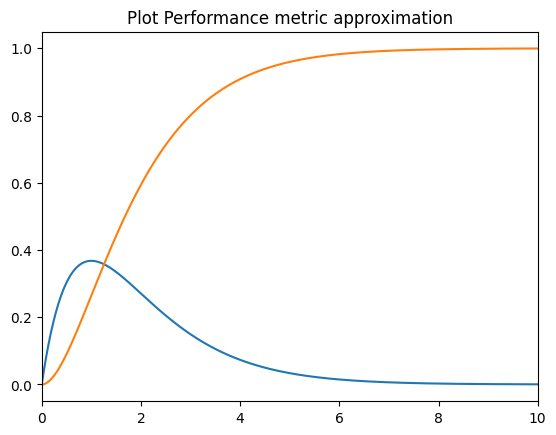

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
5.535586106946949e-83
5.535586106946949e-85
1.4880303904083346e-39
1.4880303904083345e-41
4.457532631361345e-25
4.457532631361345e-27
7.71499939185567e-18
7.714999391855671e-20
1.699341702116636e-13
1.699341702116636e-15
1.3352951181600435e-10
1.3352951181600435e-12
1.5618748189538764e-08
1.5618748189538764e-10
5.555177730218446e-07
5.555177730218446e-09
8.934529958839192e-06
8.934529958839192e-08
8.244646615975553e-05
8.244646615975553e-07
0.0005079326286860728
5.079326286860728e-06
0.0023113075829387588
2.3113075829387586e-05
0.008331743486810128
8.331743486810127e-05
0.025015667582282512
0.00025015667582282513
0.06491297129174894
0.0006491297129174894
0.14970539689893875
0.0014970539689893876
0.31358447170144915
0.0031358447170144917
0.6069853630450945
0.006069853630450945
1.101079815968661
0.01101079815968661
1.89405

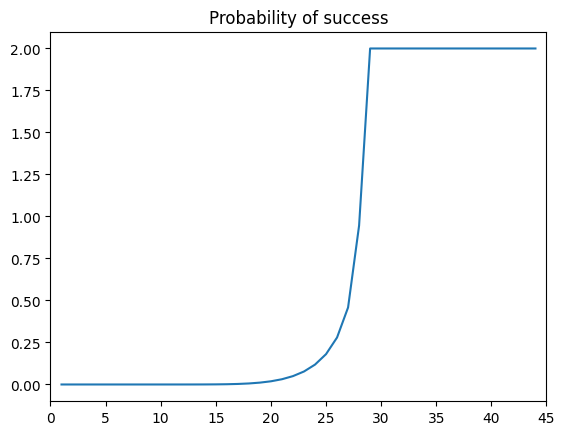

In [54]:


plt.title('Plot Performance metric approximation')

for N in [3]:
    i = N*1000
    k0 = N*10
    K = np.linspace(0, k0, i)
    #print(K)
    NSi1 = NSi(K, N)  # Compute NS1 inside the loop
    #print(NSi1)
    NCi1 = NCi(K, N)  # Compute NS1 inside the loop
    plt.plot(K/N, NSi1/N, label=f'Equation 4')
    plt.plot(K/N, NCi1/N, label=f'Equation 5')
    plt.xlim(0, 10)


    
### Plot the success probability
plt.show()
i_max = 200
k0 = 100
input_list = list(range(1,45))
print(input_list)

plist = np.zeros(len(input_list))
for i in input_list:
        K = k_array(i_max, i, i_max)
        NSi3 = NSi(K, i)  # Compute NS1 inside the loop
        #plt.plot(K/N, NSi3/N, label=f'Equation 4')

        print(NSi3.sum())
        Psuccess = NSi3.sum()/k0
        print(Psuccess)
        plist[i-1] = Psuccess
    
    
plt.title('Probability of success')
plt.xlim(0,45)
plt.plot(input_list, plist, label=f'Equation 6')




